## Title and first scene

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import calendar
import random
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, FFMpegWriter
from manim_voiceover import VoiceoverScene
from manim_voiceover.services.recorder import RecorderService
from manim_voiceover.services.gtts import GTTSService
import warnings
warnings.filterwarnings("ignore")
import compass_functions as cf
from manim import *
config.media_width = "100%"
config.verbosity = "WARNING"


Manim Community v0.17.3

# Titulo en imagen

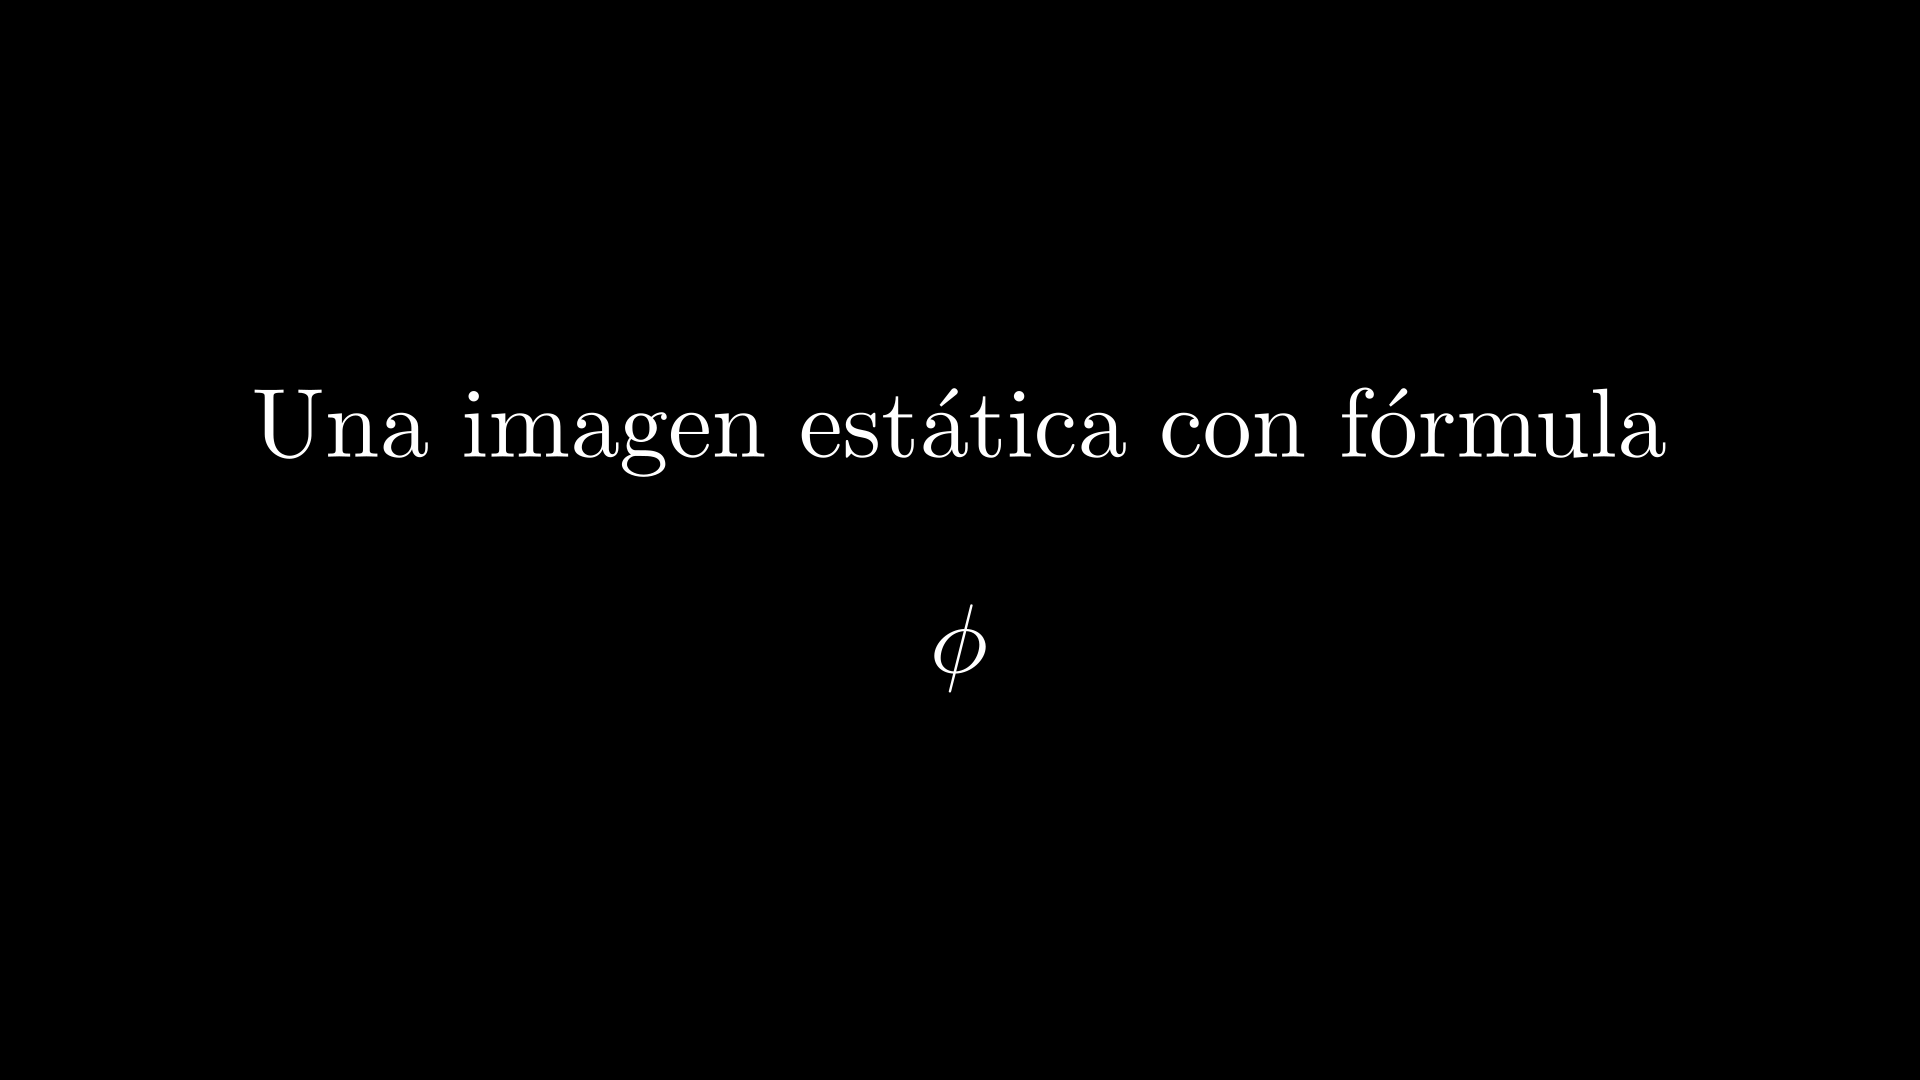

In [4]:
%%manim -qh Portada
class Portada(Scene):
    def construct(self):
        tex = Tex(r" Una imagen estática con fórmula $$\phi$$", font_size=70)
        self.add(tex)

## Otro título animado

In [5]:
%%manim -qh Portada2
class Portada2(Scene):
    def construct(self):
        tex = Tex("Un lindo título con $$\\phi$$", font_size=144)
        self.play(Write(tex))

## Otro título animado

In [6]:
%%manim -qh Titulo 
# Si pongo manim -qm es calidad media y -ql es baja
class Titulo(Scene):
    def construct(self):
        # Title
        title = Tex("Planeta Tau y los Números Compás")
        
        self.play(Write(title))

        subtitle = Tex("Si Ptolomeo hubiese conocido a Fourier")
        subtitle.next_to(title, DOWN)
        self.play(Write(subtitle))

        self.wait(3)

        self.play(FadeOut(title), FadeOut(subtitle))

$$ \Gamma(x) = \int_0^\infty t^{x-1}e^{-t} dt $$

# Plot de multiples señales complejas

In [7]:
#  Parametros a plotear
run_time=10        # Tiempo total de la animacion
num_samples=36     # Cantidad de samples para parametro t
x_o=4+1j
y_o=1+1j

A =(x_o+y_o)/2
B = (x_o-y_o)/2
foci=2*np.sqrt(A*B)
t = np.linspace(0, 2 * np.pi, num_samples)
num_points = len(t)


complex_arrays = [
    foci*(t-1/100)/(t+1/100),
    -foci*(t-1/100)/(t+1/100),
    A * np.exp(1j * t),
    B * np.exp(-1j * t),
    A * np.exp(1j * t) + B * np.exp(-1j * t)
]
angles = np.angle(-A * np.exp(1j * t))
normalized_angles = (angles - np.min(angles)) / (np.max(angles) - np.min(angles))

In [8]:
%%manim -qh AlienEpicycles
class AlienEpicycles(Scene):
    def construct(self):
        compass_text = ["Imagina un compás infinito centrado en $$z_o \in \mathbb{C}$$ Veremos como entender las figuras de Lissajous desde otra óptica  ",
                        "Con $z_o,R_{_+},R_{_-},F_{\pm} \in \mathbb{C}$ tenemos : $$z_o=z_{ox}+iz_{oy}$$ $$z_t= z_o+R_{_+} e^{it} +R_{_-} e^{-it}$$ $$F_{\pm}=\pm 2\sqrt{R_{_+}R_{_-}}$$ $$F_{-}=-F_{+}$$ Pausa el video y piensa como relacionarlo con la típica expresión $$\\left(\\frac{x}{a}\\right)^2+\left(\\frac{y}{b}\\right)^2=1$$"
            
        
        ]
        self.play_scene(compass_text)
        self.wait(2)
        
        
        
        circles = VGroup()
        theta_text = MathTex(r"\tau",)
        self.play(Write(theta_text))

        dots_groups = []
        for complex_array in complex_arrays:
            dots_group = self.plot_complex_points(complex_array)
            dots_groups.append(dots_group)

        self.play(*[Write(dots_group, run_time=run_time,lag_ratio=10) for dots_group in dots_groups])

        self.wait(6)
    


    def plot_complex_points(self, complex_array):
        dots = VGroup()
        
        colormap = plt.get_cmap("hsv")
        for complex_point, angle in zip(complex_array, normalized_angles):
            rgb_color = colormap(angle)[:3]  # Extract RGB values
            hex_color = "#" + "".join([f"{int(c * 255):02x}" for c in rgb_color])
            dot = Dot(complex_to_R3(complex_point), color=hex_color)
            dots.add(dot)

        return dots


    def play_scene(self, text_lines):
        scene_text = []
        for line in text_lines:
            scene_text.append(Tex(line))

        for i in range(len(scene_text)):
            scene_text[i].scale(0.8)
            scene_text[i].to_edge(UP * 2)
            if i > 0:
                self.play(FadeOut(prev_text))
            self.play(Write(scene_text[i]))
            self.wait(6)
            prev_text = scene_text[i]

        self.play(FadeOut(prev_text))


# Explicaciones sobre fórmulas

In [9]:
%%manim -qh FormulaEmphasis

class FormulaEmphasis(Scene):
    def construct(self):
        product_formula = MathTex(
            r"\frac{d}{dx} f(x)g(x) =",
            r"f(x) \frac{d}{dx} g(x)",
            r"+",
            r"g(x) \frac{d}{dx} f(x)"
        )
        self.play(Write(product_formula))
        box1 = SurroundingRectangle(product_formula[1], buff=0.1)
        box2 = SurroundingRectangle(product_formula[3], buff=0.1)
        self.play(Create(box1))
        self.wait()
        self.play(Transform(box1, box2))
        self.wait()

# Grid y transformaciones de la cuadrícula

In [10]:
%%manim -ql OpeningManim

class OpeningManim(Scene):
    def construct(self):
        title = Tex(r"Una fórmula por aquí")
        basel = MathTex(r"\sum_{n=1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}")
        VGroup(title, basel).arrange(DOWN)
        self.play(
            Write(title),
            FadeIn(basel, shift=UP),
        )
        self.wait()

        transform_title = Tex("Una transformación por aquí")
        transform_title.to_corner(UP + LEFT)
        self.play(
            Transform(title, transform_title),
            LaggedStart(*[FadeOut(obj, shift=DOWN) for obj in basel]),
        )
        self.wait()

        grid = NumberPlane(x_range=(-30, 30, 1), y_range=(-60.0, 60.0, 1))
        grid_title = Tex("Un grid")
        grid_title.scale(1.5)
        grid_title.move_to(transform_title)

        self.add(grid, grid_title)
        self.play(
            FadeOut(title),
            FadeIn(grid_title, shift=DOWN),
            Create(grid, run_time=3, lag_ratio=0.1),
        )
        self.wait()

        grid_transform_title = Tex(
            r"Eso fue una función no lineal \\ aplicada a la cuadrícula"
        )
        grid_transform_title.move_to(grid_title, UL)
        grid.prepare_for_nonlinear_transform()
        self.play(
            grid.animate.apply_function(
                lambda p: p + np.array([np.sin(p[1]), np.sin(p[0]), 0])
            ),
            run_time=3,
        )
        self.wait()
        self.play(Transform(grid_title, grid_transform_title))
        self.wait()

## Animaciones baśicas


In [11]:
%%manim -ql Malabares

class Malabares(Scene):
    def construct(self):
        square = Square()
        circle = Circle()
        circle.shift(2 * UP + 2 * RIGHT)
        triangle = Triangle()
        triangle.shift(2 * UP + 2 * LEFT)
        anno = Tex("Malabares")
        anno.shift(2 * DOWN)
        self.add(anno)
        self.add(square)
        self.add(circle)
        self.add(triangle)
        self.play(CyclicReplace(square, circle, triangle))

# Voice over desde texto

In [12]:
%%manim -ql Voces 
class Voces(VoiceoverScene):
    def construct(self):
        self.set_speech_service(GTTSService(lang="es,en", tld="com"))

        circle = Circle()
        square = Square().shift(2 * RIGHT)

        with self.voiceover(text="Hola como están") as tracker:
            self.play(Create(circle), run_time=tracker.duration)

        with self.voiceover(text="La vida en el planeta Tau") as tracker:
            self.play(circle.animate.shift(2 * LEFT), run_time=tracker.duration)

        with self.voiceover(text="Imaginemos como puede ser") as tracker:
            self.play(Transform(circle, square), run_time=tracker.duration)

        with self.voiceover(text="Thank you"):
            self.play(Uncreate(circle))

        self.wait()


# Escenas de ejemplo 

## Números complejos

In [13]:
%%manim -ql NumerosComplejos
class NumerosComplejos(Scene):
    def construct(self):
        title = Text("Números Complejos", font_size=72).shift(UP * 2)
        self.play(Write(title))

        complex_def = MathTex(r"z = a + bi", font_size=60).next_to(title, DOWN)
        self.play(Write(complex_def))

        self.wait(2)


In [14]:
%%manim -ql NumerosComplejos2
class NumerosComplejos2(Scene):
    def construct(self):
        title = Text("Números Complejos", font_size=72).shift(UP * 2)
        self.play(Write(title))

        complex_def = MathTex(r"z = a + bi", font_size=60).next_to(title, DOWN)
        self.play(Write(complex_def))

        self.wait(2)

        polar_def = MathTex(r"z = r(\cos \theta + i \sin \theta)", font_size=60).next_to(complex_def, DOWN)
        self.play(Write(polar_def))

        self.wait(2)

        euler_identity = MathTex(r"e^{i\theta} = \cos \theta + i \sin \theta", font_size=60).next_to(polar_def, DOWN)
        self.play(Write(euler_identity))

        self.wait(2)

        taylor_series = MathTex(r"e^{ix} = 1 + ix + \frac{(ix)^2}{2!} + \frac{(ix)^3}{3!} + \frac{(ix)^4}{4!} + \dots", font_size=60).next_to(euler_identity, DOWN)
        self.play(Write(taylor_series))

        self.wait(2)

        self.play(FadeOut(title), FadeOut(complex_def), FadeOut(polar_def), FadeOut(euler_identity), FadeOut(taylor_series))

        self.wait(2)




## Plano complejo

In [15]:
%%manim -ql PlanoComplejo
class PlanoComplejo(Scene):
    def construct(self):
        plane = ComplexPlane()
        self.add(plane)

        self.play(Create(plane))

        # Animate points and vectors
        z = 2 + 3j
        z_dot = Dot(plane.n2p(z), color=YELLOW)
        z_label = MathTex("z = 2 + 3i").next_to(z_dot, UL)

        self.play(Create(z_dot), Write(z_label))
        self.wait(1)

        v = Arrow(start=ORIGIN, end=plane.n2p(z), color=BLUE)
        v_label = MathTex("2 + 3i").next_to(v, UR)

        self.play(Create(v), Write(v_label))
        self.wait(2)


In [16]:
%%manim -ql PlanoComplejo2
class PlanoComplejo2(Scene):
    def construct(self):
        # Complex Plane
        plane = ComplexPlane()
        self.add(plane)
        self.play(Create(plane))

        # Animate points and vectors
        z = 2 + 3j
        z_dot = Dot(plane.n2p(z), color=YELLOW)
        z_label = MathTex("z = a + bi").next_to(z_dot, UL)
        self.play(Create(z_dot), Write(z_label))
        self.wait(1)

        v = Arrow(start=ORIGIN, end=plane.n2p(z), color=BLUE)
        v_label = MathTex("2 + 3i").next_to(v, UR)
        self.play(Create(v), Write(v_label))
        self.wait(2)

        # Explanation for polar representation
        polar_coords = MathTex(r"z = r(\cos(\theta) + i\sin(\theta))", font_size=32).shift(UL * 1.8)
        self.play(Write(polar_coords))

        conversion_formulas = MathTex(r"r = \sqrt{a^2 + b^2}", r"\theta = \arctan\left(\frac{b}{a}\right)", font_size=32).arrange(DOWN, aligned_edge=LEFT).next_to(polar_coords, DOWN)
        self.play(Write(conversion_formulas))

        
        self.wait(2)

In [17]:
%%manim -ql PlanoComplejo3
class PlanoComplejo3(Scene):
    def construct(self):
        # Complex Plane
        plane = ComplexPlane()
        self.add(plane)
        self.play(Create(plane))

        # Animate points and vectors
        z = 2 + 3j
        z_dot = Dot(plane.n2p(z), color=YELLOW)
        z_label = MathTex("z = a + bi=re^{i\\theta}").next_to(z_dot, UL*1.3)
        z_label_bg=BackgroundRectangle(z_label,fill_opacity=0.8,buff=0.1)
        self.play(Create(z_dot), Create(z_label_bg), Write(z_label))
        self.wait(1)

        v = Arrow(start=ORIGIN, end=plane.n2p(z), color=BLUE)
        v_label = MathTex("2 + 3i").next_to(v, UR).scale(0.5)
        v_label_bf =BackgroundRectangle(v_label,fill_opacity=0.8,buff=0.1)
        v_label_with_bg=VGroup(v_label,v_label_bf)
        self.play(Create(v), Create(v_label_bf),Write(v_label))
        
        # Calculate the angle theta
        theta = np.angle(z)
        arc_radius = 0.8
        arc = Arc(start_angle=0, angle=theta, radius=arc_radius, color=RED)
        

        # Create a label for the angle theta with a gray background
        theta_label = MathTex(r"\theta").scale(0.8).next_to(arc)
        theta_label_bg = BackgroundRectangle(theta_label, fill_opacity=0.8, buff=0.1)
        theta_label_with_bg = VGroup(theta_label_bg, theta_label)
        self.play(Create(arc), Create(theta_label_bg), Write(theta_label))

        self.wait(2)

        # Explanation for polar representation
        polar_coords = MathTex(r"z = re^{i\theta}=r\cos{\theta} + ir\sin{\theta}", font_size=32).shift(DR*1.2)
        polar_coords_bg = BackgroundRectangle(polar_coords, fill_opacity=0.8, buff=0.2)
        polar_coords_with_bg = VGroup(polar_coords_bg, polar_coords)
        self.play(Write(polar_coords_with_bg))

        conversion_formulas = MathTex(r"r = \sqrt{a^2 + b^2}", r"\theta = \arctan\left(\frac{b}{a}\right)", font_size=32).arrange(DOWN, aligned_edge=LEFT).next_to(polar_coords_with_bg, DOWN)
        conversion_formulas_bg = BackgroundRectangle(conversion_formulas, fill_opacity=0.8, buff=0.2)
        conversion_formulas_with_bg = VGroup(conversion_formulas_bg, conversion_formulas)
        self.play(Write(conversion_formulas_with_bg))

        self.wait(6)


In [25]:
%%manim -ql PlanoComplejo4

class PlanoComplejo4(Scene):
    def construct(self):
        # Create the polar grid
        self.create_polar_grid()

        # Animate points and vectors
        z = 2 + 3j
        z_dot = Dot(self.n2p_polar(np.abs(z), np.angle(z)), color=YELLOW)
        z_label = MathTex("z = a + bi = re^{i\\theta}").next_to(z_dot, UL*1.3)
        z_label_bg = BackgroundRectangle(z_label, fill_opacity=0.8, buff=0.1)
        self.play(Create(z_dot), Create(z_label_bg), Write(z_label))
        self.wait(1)

        v = Arrow(start=ORIGIN, end=self.n2p_polar(np.abs(z), np.angle(z)), color=BLUE)
        v_label = MathTex("2 + 3i").next_to(v, UR).scale(0.5)
        v_label_bg = BackgroundRectangle(v_label, fill_opacity=0.8, buff=0.1)
        v_label_with_bg = VGroup(v_label, v_label_bg)
        self.play(Create(v), Create(v_label_bg), Write(v_label))

        # Calculate the angle theta
        theta = np.angle(z)
        arc_radius = 0.8
        arc = Arc(start_angle=0, angle=theta, radius=arc_radius, color=RED)
        theta_label = MathTex(r"\theta").scale(0.8).next_to(arc)
        theta_label_bg = BackgroundRectangle(theta_label, fill_opacity=0.8, buff=0.1)
        theta_label_with_bg = VGroup(theta_label_bg, theta_label)
        self.play(Create(arc), Create(theta_label_bg), Write(theta_label))

        self.wait(2)

        # Explanation for polar representation
        polar_coords = MathTex(r"z = re^{i\theta} = r\cos{\theta} + ir\sin{\theta}", font_size=32).shift(DR*1.2)
        polar_coords_bg = BackgroundRectangle(polar_coords, fill_opacity=0.8, buff=0.2)
        polar_coords_with_bg = VGroup(polar_coords_bg, polar_coords)
        self.play(Write(polar_coords_with_bg))

        conversion_formulas = MathTex(r"r = \sqrt{a^2 + b^2}", r"\theta = \arctan\left(\frac{b}{a}\right)", font_size=32).arrange(DOWN, aligned_edge=LEFT).next_to(polar_coords_with_bg, DOWN)
        conversion_formulas_bg = BackgroundRectangle(conversion_formulas, fill_opacity=0.8, buff=0.2)
        conversion_formulas_with_bg = VGroup(conversion_formulas_bg, conversion_formulas)
        self.play(Write(conversion_formulas_with_bg))

        self.wait(6)

    def create_polar_grid(self):
        # Create radial lines
        for r in range(1, 6):
            radial_line = AnnularSector(inner_radius=0, outer_radius=r, angle=TAU, fill_opacity=0.1, color=GREY)
            self.play(Create(radial_line))

        # Create angular lines
        for angle in np.arange(0, TAU, TAU / 12):
            arc = Arc(start_angle=angle, angle=TAU / 12, radius=5, color=GREY)
            self.play(Create(arc))

    def n2p_polar(self, r, theta):
        return r * np.cos(theta) * RIGHT + r * np.sin(theta) * UP


## Plot 3D ejemplo 

### parametrico 3D

In [19]:
%%manim -ql ThreeDParametricCurve
class ThreeDParametricCurve(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        self.set_camera_orientation(phi=60 * DEGREES, theta=-45 * DEGREES)
        
        def parametric_curve(t):
            x = np.cos(t)
            y = np.sin(t)
            z = t
            return np.array([x, y, z])
        
        curve = ParametricFunction(parametric_curve, t_range=[-PI, PI], color=RED)
        
        self.play(Create(axes))
        self.play(Create(curve))
        self.wait()


### Superficie 3D

In [ ]:
%%manim -ql ThreeDSurfacePlot
class ThreeDSurfacePlot(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        self.set_camera_orientation(phi=60 * DEGREES, theta=-45 * DEGREES)
        self.begin_ambient_camera_rotation(rate=0.1)
        self.wait()
        
        def surface_function(x, y):
            return 3.14*np.exp(-0.8*(x**2+y**2))
        
        surface = Surface(
            lambda u, v: axes.c2p(u, v, surface_function(u, v)),
            u_range=(-PI, PI),
            v_range=(-PI, PI),
            checkerboard_colors=[BLUE_D, BLUE_E],
            resolution=(20, 20)
        )
        
        self.play(Create(axes))
        self.play(Create(surface))
        self.wait()

### 3D SCATTER

In [21]:
%%manim -ql ThreeDScatterPlot
class ThreeDScatterPlot(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        self.set_camera_orientation(phi=60 * DEGREES, theta=-45 * DEGREES)
        
        points_data = [
            (1, 1, 1),
            (2, -1, 3),
            (-1, 2, 2),
            (0, 0, 4),
            (-2, -2, 1)
        ]
        
        scatter_points = [Sphere(radius=0.1).move_to(axes.c2p(x, y, z)) for x, y, z in points_data]
        
        self.play(Create(axes))
        self.play(*[Create(point) for point in scatter_points])
        self.wait()


### Definir orbitas 3D

In [22]:
%%manim -ql ThreeDScatterPlot2

class ThreeDScatterPlot2(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        self.set_camera_orientation(phi=60 * DEGREES, theta=-45 * DEGREES)
        
        def orbit_function_1(t):
            x = 2 * np.cos(t)
            y = 2 * np.sin(t)
            z = t
            return np.array([x, y, z])
        
        def orbit_function_2(t):
            x = np.cos(t)
            y = np.sin(t) * 2
            z = 0.5 * np.abs(x+1j*y)
            return np.array([x, y, z])
        
        def orbit_function_3(t):
            x = np.sin(t)
            y = 0.5 * np.cos(t)
            z = 0.5 * np.cos(3*t)
            return np.array([x, y, z])
        
        orbit_paths = [ParametricFunction(orbit_function_1, t_range=[-PI, PI]),
                       ParametricFunction(orbit_function_2, t_range=[-PI, PI]),
                       ParametricFunction(orbit_function_3, t_range=[-PI, PI])]
        
        scatter_points = [Sphere(radius=0.1).move_to(orbit_paths[i].points[0]) for i in range(3)]
        
        self.add(axes)
        self.play(*[Create(point) for point in scatter_points])
        
        for i in range(3):
            self.play(MoveAlongPath(scatter_points[i], orbit_paths[i]), run_time=3)
            self.wait()


### Otros ejemplos

In [23]:
%%manim -ql  EllipseAnimation 
class EllipseAnimation(ThreeDScene):
    def construct(self):
        # Parameters
        x_o = 3.01
        y_o = 3
        num_samples =13
        axes = ThreeDAxes()
        self.set_camera_orientation(phi=60 * DEGREES, theta=-45 * DEGREES)
        self.add(axes)

        # Generate ellipse points
        t = np.linspace(2 * np.pi/num_samples, 2 * np.pi, num_samples)
        x_t = x_o * np.cos(t)
        y_t = y_o * np.sin(t)

        # Plot ellipse
        ellipse = VGroup()
        colors = color_gradient([RED,ORANGE,YELLOW,BLUE,PURPLE], num_samples)
        for i, (x, y) in enumerate(zip(x_t, y_t)):
            z = np.log(i+1)  # Adjust the height here
            sphere = Dot3D(radius=0.05, color=colors[i])
            sphere.move_to([x, y, z])
            ellipse.add(sphere)

        self.play(Write(ellipse))

        # Label the spheres
        labels = VGroup()
        for i, sphere in enumerate(ellipse):
            label = MathTex(f"P_{i}").scale(0.5)
            label.next_to(sphere, RIGHT, buff=0.2)
            labels.add(label)

        self.play(Write(labels))

        self.wait(2)
        

  


In [24]:
%%manim -ql SolarSystem
class SolarSystem(Scene):
    def construct(self):
        # Constants
        sun_radius = 1.0
        earth_radius = 0.5
        moon_radius = 0.03

        # Objects
        sun = Sphere(radius=sun_radius, color=YELLOW)
        earth = Sphere(radius=earth_radius, color=BLUE)
        moon = Sphere(radius=moon_radius, color=GREY)

        # Positions
        sun.move_to(ORIGIN)
        earth.move_to(3 * RIGHT)
        moon.move_to(3 * RIGHT + 1.5 * UP)

        # Paths
        earth_orbit = Circle(radius=6, color=BLUE, stroke_opacity=0.5)
        moon_orbit = Circle(radius=1, color=GREY, stroke_opacity=0.5)

        # Add objects to the scene
        self.add(sun)
        self.play(GrowFromCenter(earth))
        self.play(GrowFromCenter(moon))
        self.wait()

        self.play(GrowFromCenter(earth_orbit))
        self.play(GrowFromCenter(moon_orbit))
        self.wait()

        # Animation: Rotation
        earth.add_updater(lambda m, dt: m.rotate(0.02 * dt, axis=OUT, about_point=ORIGIN))
        moon.add_updater(lambda m, dt: m.rotate(0.1 * dt, axis=OUT, about_point=earth.get_center()))
        self.add(earth, moon)
        self.wait(5)  # Change the duration of the animation as needed

        # Animation: Earth's orbit around the sun
        earth.add_updater(lambda m, dt: m.rotate(0.005 * dt, axis=UP, about_point=ORIGIN))
        self.add(earth)
        self.wait(10)  # Change the duration of the animation as needed

        # Animation: Moon's orbit around the earth
        moon.add_updater(lambda m, dt: m.rotate(0.02 * dt, axis=UP, about_point=earth.get_center()))
        self.add(moon)
        self.wait(10)  # Change the duration of the animation as needed


# Unir animaciones



## Otros plots

## Grabando el voiceover

# Algo simple